<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_17_Tom_Njoroge_Python_Note_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining our research question 

In this research we will look more into the preference of Blue-car versus utilib cars. We will tests the hypothesis that Blue cars are highly preffered over Utilib cars 

# Importing our libraries 

In [0]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Loading our dataset 

In [2]:
auto_lib = pd.read_csv('autolib_daily_events_postal_code.csv')
auto_lib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Data cleaning 

To clean our data we will perofrm few procedures to view the nature of our dataset

In [3]:
auto_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [4]:
auto_lib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [5]:
auto_lib.isnull().values.any()

False

In [6]:
auto_lib.duplicated().values.any()

False

In [8]:
auto_lib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

Checking for outliers in our dataset 

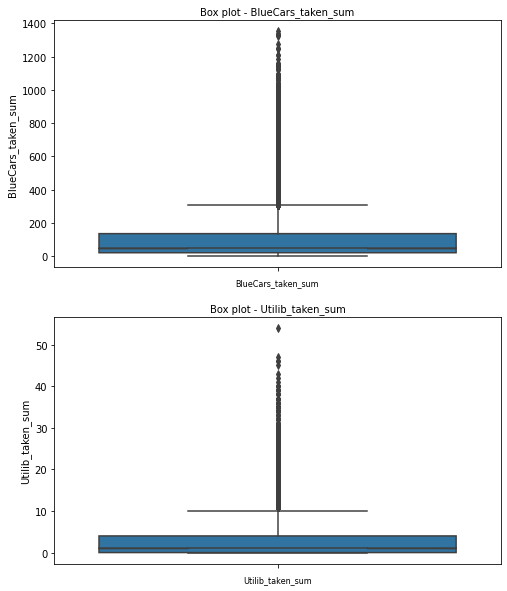

In [9]:
col_names = ['BlueCars_taken_sum', 'Utilib_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=auto_lib[col_val], notch=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Univariate Analysis 

To perform Univariate analysis we will take the columns we will be using i.e. Blue cars and Utilib Cars 

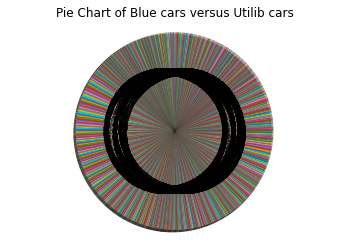

In [41]:
cars = auto_lib.groupby(['BlueCars_taken_sum'])['Utilib_taken_sum'].sum()
plt.pie(cars, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Blue cars versus Utilib cars')
plt.show()


# Bivariate analysis 

In [42]:
df_a = auto_lib.iloc[:, 5:9]
df_a.tail(5)

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum
16080,15,10,0,0
16081,19,19,0,0
16082,33,35,1,1
16083,11,14,3,5
16084,2,2,2,1


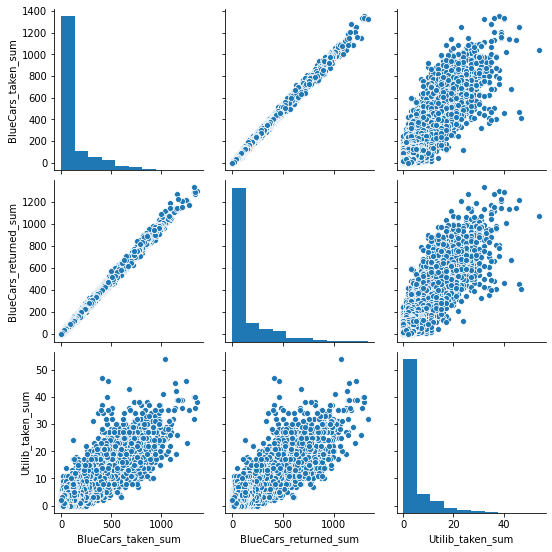

In [25]:
sns.pairplot(df_a)
plt.show()

# Hypothesis Statement Formulation 

In this section we will define and conduct a hypothesis testing to our dataset. We will seek to search for the Null hypothesis i.e. the estimated population size that belives Blue cars (electirc cars) are highly preffered over Utilib cars, and the Alternative hypothesis which claims that the opposite of the Null hypothesis is true for our case Utilib cars are higly preffered unlike Blue cars. 

Null hypothesis 

In [0]:
#our null hypothesis could be denoted as 
Ho: p = 0.5 

Alternative Hypothesis 

While as our alternative hypothesis maybe denoted as Ha: p =/ 0.5 i.e. is not 0.5 

# Hypothesis testing and computation 

Subsequently, we will then compute and test for our hypothesis 

Our P-test hypothesis proves that oour Null hypothesis is true since users prefer Blue cars over Utilib Cars  

In [62]:
#Looking at the total number of Blue cars and Utillib cars which is as 2025535 and 138340 repectively 
#it is evident that blue cars were preferred over utilib cars 
x = 2025535 + 138340
print(x)
y = x / 2025535
print("The P-value then is:", y)

2163875
The P-value then is: 1.0682980052183744


We will first find the sum, standard deviation and average of our two columns 

Average and standard deviation of Blue cars 

In [46]:
blue_average = auto_lib['BlueCars_taken_sum'].mean()
blue_average

125.92695057506994

In [49]:
blue_standard_deviation = auto_lib['BlueCars_taken_sum'].std()
blue_standard_deviation

185.42657876727893

In [52]:
sum_blue_car = auto_lib['BlueCars_taken_sum'].sum()
sum_blue_car

2025535

Average and standard deviation of Utilib Cars 

In [50]:
utilib_average = auto_lib['Utilib_14_taken_sum'].mean()
utilib_average

8.600559527510102

In [51]:
utilib_standard_deviation = auto_lib['Utilib_14_taken_sum'].std()
utilib_standard_deviation

12.870098297095637

In [54]:
utilib_sum = auto_lib['Utilib_14_taken_sum'].sum()
utilib_sum 

138340

Therefore the z-score can be computed as follows 

In [56]:
#Blue cars 
Average = 125.92695
Standard_deviation = 185.4266
# the Z-score = sum of oberved values - mean / standard deviation 
z_score_bluecar = (2025535 - 125.92695) / 185.4266
z_score_bluecar

10922.9693746744

In [57]:
#Utilib Cars 
Average = 8.601
Standard_deviation = 12.870
# the Z-score = sum of oberved values - mean / standard deviation
z_score_utilib = (138340 - 8.601) /  12.870
z_score_utilib

10748.360450660452

# Hypothesis Testing interpletation 

We decided to perform a z-test or z-score since the sample we used i.e. our dataset is greater than 30. As a result, the above results can be interpleted as a prove to find whether the hypothesis tsting follows a normal distribution. Normal distribution can be proven when the results between the two variable in our case Blue cars and Utilib cars are closly related just as proved by our resuts above 